In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn/customer_churn_large_dataset.xlsx


# TELECOM CUSTOMER CHURN PREDICTION 📈

## Introduction

**What is Customer Churn?**  
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. In the telecom industry, customers have the option to switch service providers, leading to an annual churn rate of 15-25%. Reducing customer churn is crucial, as acquiring new customers is more expensive than retaining existing ones.


**How can customer churn be reduced?**  
To reduce customer churn, telecom companies need to predict which customers are at high risk of leaving. By forecasting potential churn, companies can focus their retention efforts on these "high risk" customers, leading to increased customer loyalty and profitability.


**Objectives**  
In this analysis, we aim to explore the data and address questions such as:
- What is the percentage of churn customers versus active customers?
- Are there any patterns in churn based on gender?
- Are there preferences among churn customers based on the type of service?
- What are the most profitable service types and features?
- Which features and services contribute the most to profitability?


* Importing Libraries

In [2]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# 1. Importing Dataset

In [3]:
data = pd.read_excel("/kaggle/input/customer-churn/customer_churn_large_dataset.xlsx")
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.shape

(100000, 9)

* Dropping unwanted columns

In [5]:
df = data.drop(['Name','CustomerID'],axis=1)

# Understanding the data
The dataset contains customer attributes, and each row represents a customer. Let's take a look at the first few rows of the dataset:

In [6]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [7]:
# Calculate churn rate, duplicates, and missing values

# number of churn and non-churn 
count = df.Churn.value_counts()
percentage_churn = (count[1] / (count[0] + count[1])) * 100

# duplicates 
duplicates = len(df[df.duplicated()])

# missing values
missing_values = df.isnull().sum().sum()

# Data types in dataset
types = df.dtypes.value_counts()

In [8]:
print("Churn Rate = %.1f %%"%(percentage_churn))
print('Number of Duplicate Entries: %d'%(duplicates))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Features: %d'%(df.shape[1]))
print('Number of Customers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Churn Rate = 49.8 %
Number of Duplicate Entries: 0
Number of Missing Values: 0
Number of Features: 7
Number of Customers: 100000
Data Types and Frequency in Dataset:
int64      4
object     2
float64    1
dtype: int64


# 2. Data Manipulation and Visualization
In this section, we'll explore the dataset and visualize the data to gain insights.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


<Axes: >

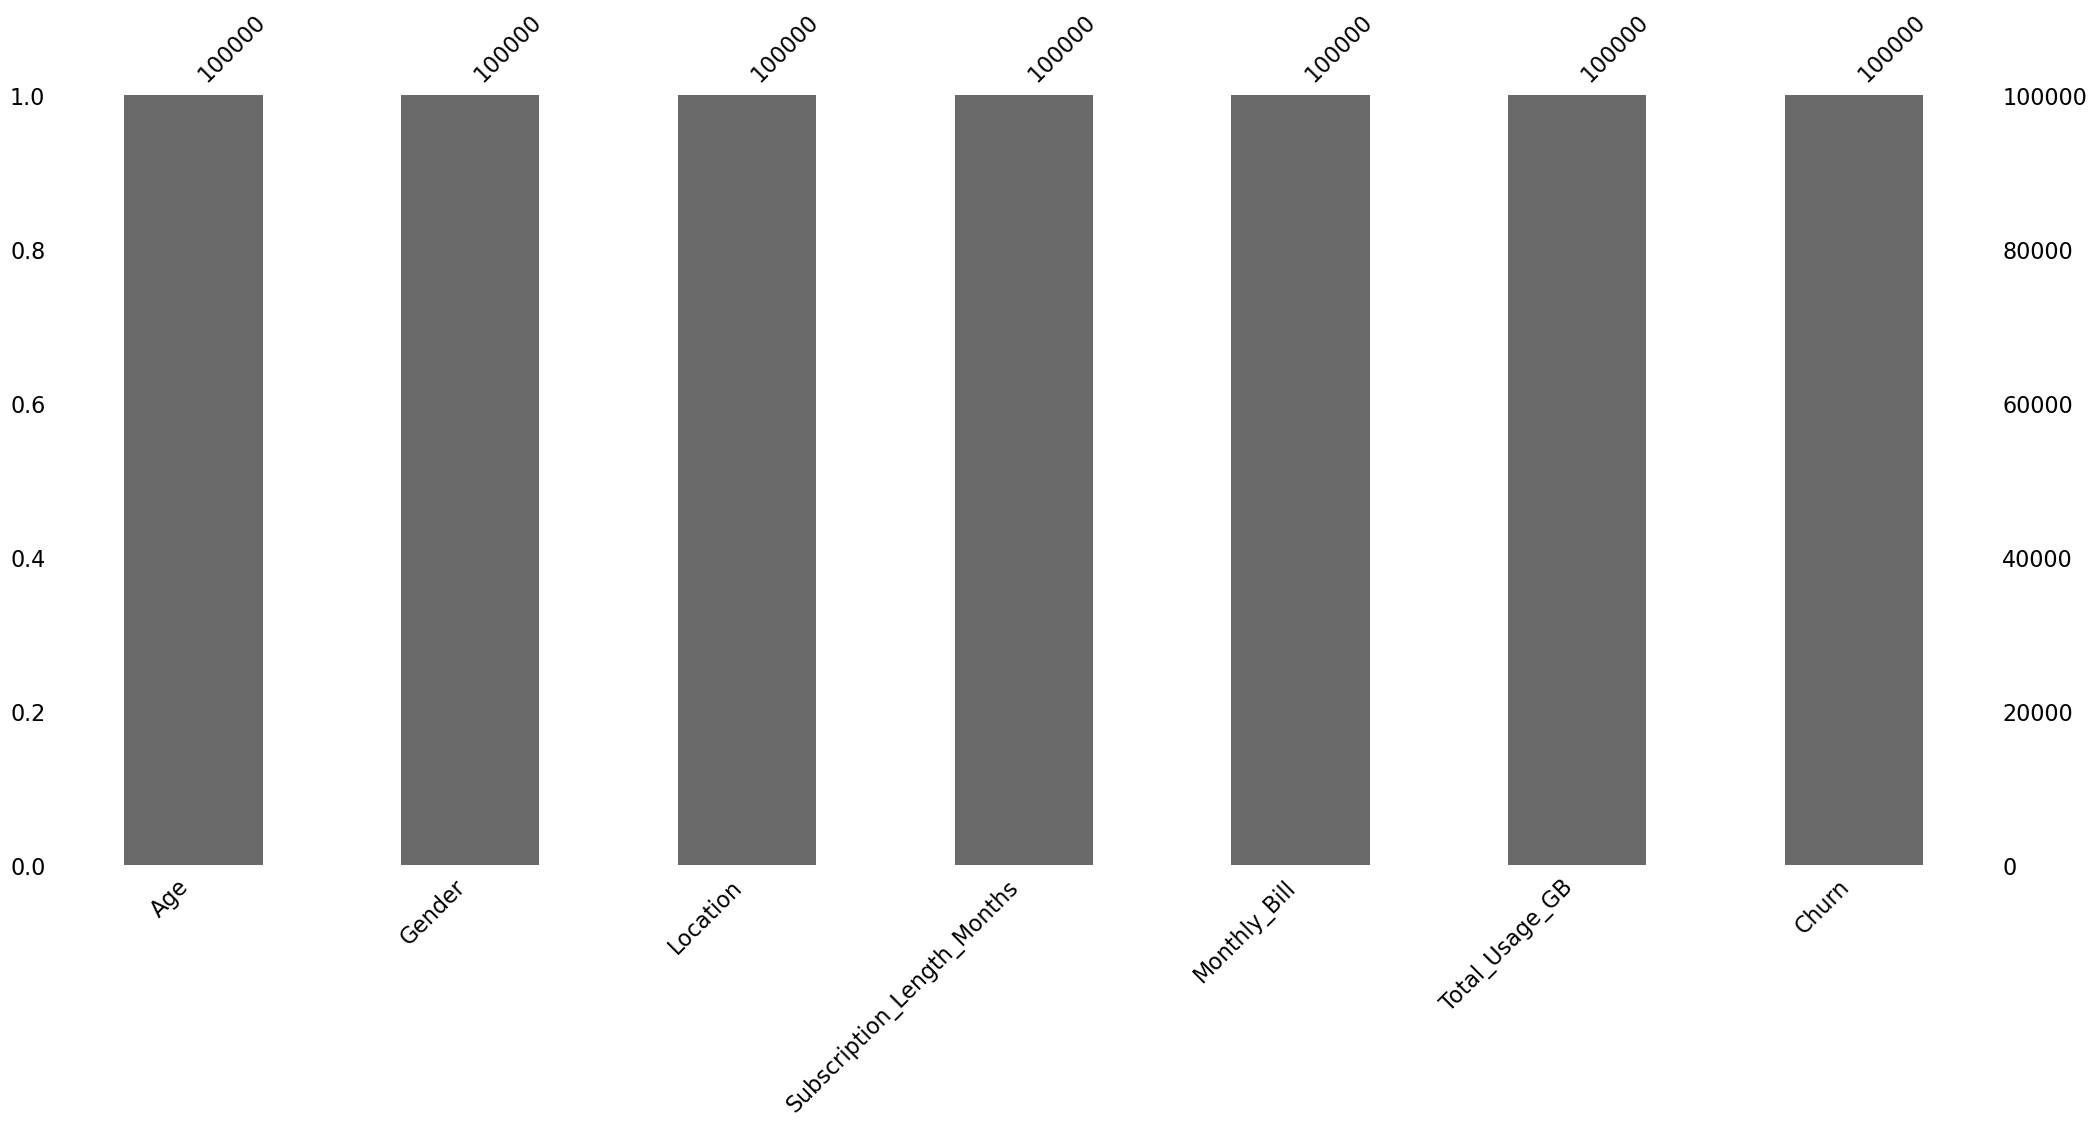

In [10]:
msno.bar(df)

In [11]:
df.isnull().sum()
# No null values

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [12]:
df.duplicated().sum()
# No duplicate values

0

In [13]:
import plotly.express as px

In [14]:
hierarchical_data = df.groupby(['Gender','Location']).sum().reset_index()
hierarchical_data.head()

,Gender,Location,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,Female,Chicago,442706,125364,651190.71,2759402,4997
1,Female,Houston,441432,124460,651881.80,2719040,4918
2,Female,Los Angeles,440860,126221,655548.83,2780522,4928
3,Female,Miami,446317,126925,654205.87,2779637,5106
4,Female,New York,438910,124122,651619.36,2749388,4995


In [15]:
fig_circle_packing = px.sunburst(
    hierarchical_data,
    path=['Location','Gender'],
    values='Churn',
    title='Data Distribution'
)

fig_circle_packing.show()

In [16]:
import plotly.express as px
count = df['Churn'].value_counts()
plt.figure(figsize = (5,5), dpi = 200)
fig = px.pie(count , names = count.index, values = count.values, title = 
             '% Churn and Non-Churn', color_discrete_sequence=['black', 'red'])
fig.show()
# Data seems to be balanced, so we focus on accuracy than precision

<Figure size 1000x1000 with 0 Axes>

* Histogram

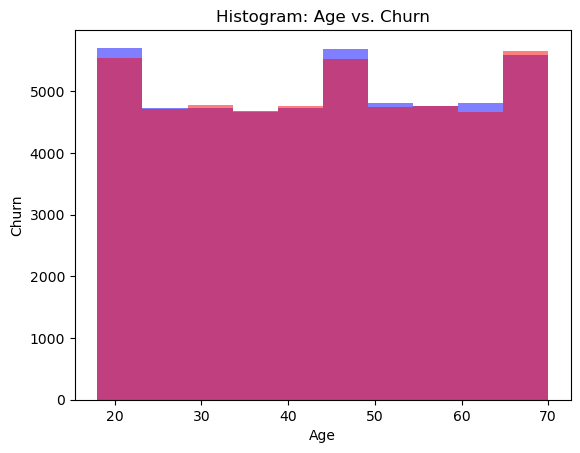

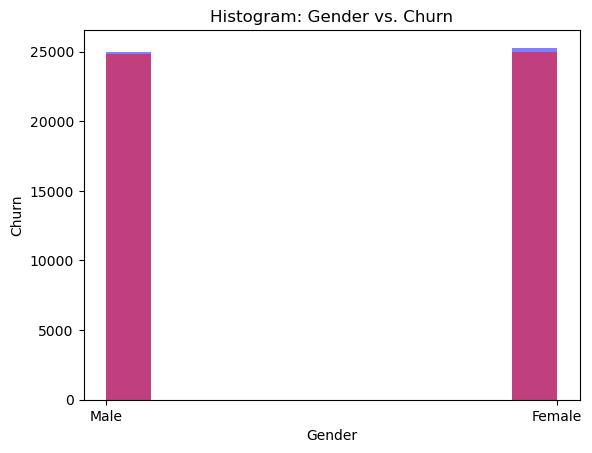

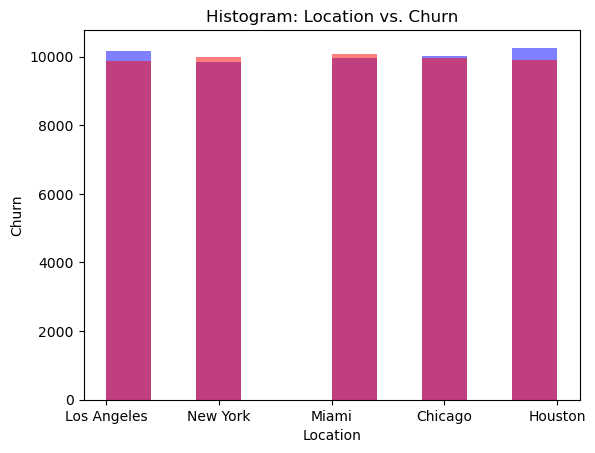

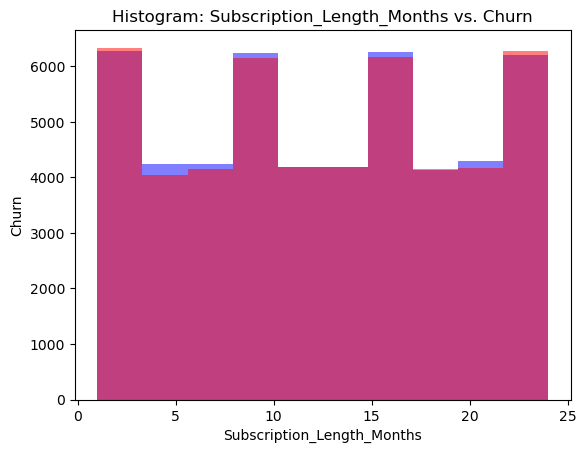

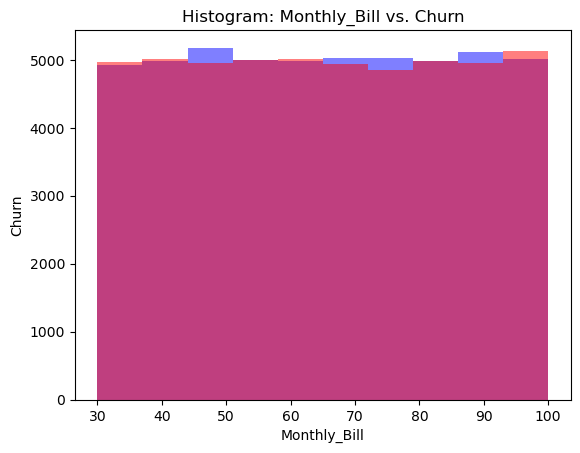

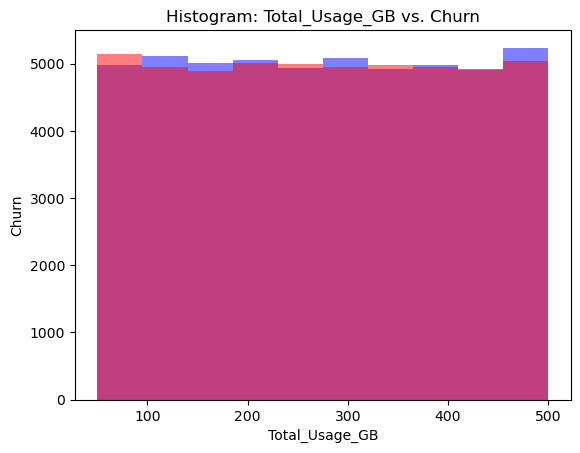

In [17]:
# Get the list of column names (excluding the target variable)
features = df.columns.drop('Churn')

# Create scatter plots for each feature against the target variable
for feature in features:
    plt.figure()
    plt.hist(df[df['Churn'] == 0][feature], color='blue', alpha=0.5, label='Not Churn')
    plt.hist(df[df['Churn'] == 1][feature], color='red', alpha=0.5, label='Churn')
    plt.xlabel(feature)
    plt.ylabel('Churn')
    plt.title(f'Histogram: {feature} vs. Churn')

# Display the plot
plt.show()

In [18]:
from scipy import stats

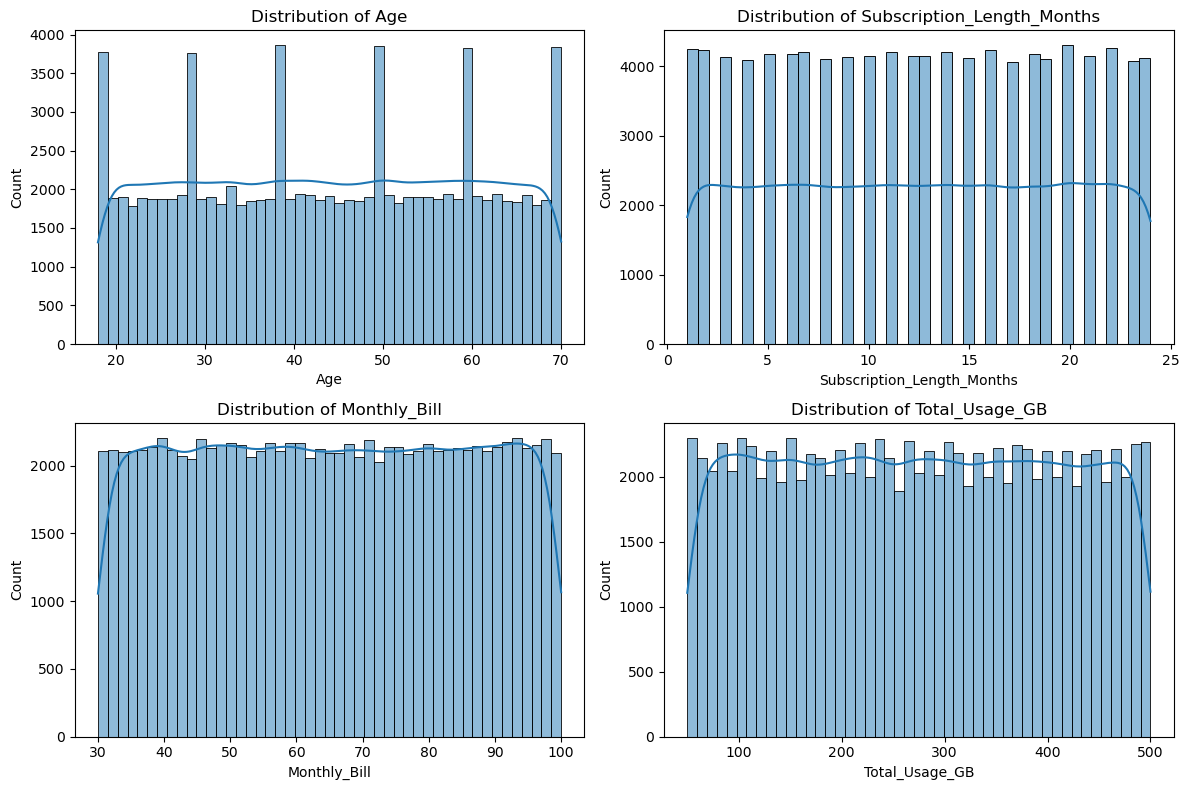

In [19]:
# Visualize the distribution of numerical features
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

In [20]:
# Detect potential outliers using the IQR method
outliers = {}
for feature in numerical_features:
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

print("Potential Outliers:")
for feature, outlier_rows in outliers.items():
    if not outlier_rows.empty:
        print(f"Feature: {feature}")
        print(outlier_rows)
        print("-" * 30)

Potential Outliers:


When considering whether to use MinMaxScaler or StandardScaler for our dataset, I observed that the mean of our features is relatively constant across different features. This suggests that our data is already centered around a similar value. In this scenario, both MinMaxScaler and StandardScaler could potentially yield similar results, as they both aim to center and scale the data.

However, I opted to use StandardScaler because it scales the data based on the standard deviation. This aspect of StandardScaler can capture variations in the data that might not be immediately apparent from just looking at the mean. By considering the standard deviation, we can ensure that any underlying patterns or variations in the data are appropriately captured in the scaled features.

In summary, while both MinMaxScaler and StandardScaler could have been suitable choices, I chose StandardScaler to ensure that our scaled features capture the full range of variations present in the data, even if the means were consistent.

# 3. Data Preprocessing
Before building machine learning models, we need to preprocess the data. This includes handling missing values, encoding categorical variables, and scaling numeric attributes.

In [21]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [22]:
X0 = df.drop(['Churn'],axis=1)

In [23]:
X0.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266


In [24]:
y0 = df['Churn']
y0.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [25]:
# Encoding categorical variables
X0 = pd.get_dummies(X0, columns=['Gender', 'Location'], drop_first=True)

In [26]:
X0.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,1
2,24,5,85.47,460,0,0,1,0,0
3,36,3,97.94,297,0,0,0,1,0
4,46,19,58.14,266,0,0,0,1,0


In [27]:
print('New Number of Features of X dataframe: %d'%(X0.shape[1]))

New Number of Features of X dataframe: 9


In [28]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.2, random_state=42)

In [29]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Calculate the correlation matrix between scaled features and 'Churn'
correlation_scaled_churn = pd.DataFrame(X_train_scaled, columns=X_train.columns).corrwith(y_train)

# Print the correlation values
print(correlation_scaled_churn)

Age                           0.003456
Subscription_Length_Months    0.009336
Monthly_Bill                  0.001998
Total_Usage_GB               -0.002928
Gender_Male                   0.013815
Location_Houston              0.002571
Location_Los Angeles         -0.008213
Location_Miami                0.005178
Location_New York            -0.001034
dtype: float64


# 4. Feature Engineering

In [31]:
df1=df.copy()

In [32]:
# Feature Interaction
df1['Interaction_Subscription_Bill'] = df1['Subscription_Length_Months'] * df1['Monthly_Bill']

# Age Binning
bins = [0, 30, 60, 100]
labels = ['Young', 'Adult', 'Senior']
df1['Age_Category'] = pd.cut(df1['Age'], bins=bins, labels=labels)

# Log Transform
df1['Log_Total_Usage_GB'] = np.log(df1['Total_Usage_GB'] + 1)  # Adding 1 to avoid log(0)

# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['Gender', 'Location', 'Age_Category'], drop_first=True)

# Feature Ratios
df1['Usage_Per_Month'] = df1['Total_Usage_GB'] / df1['Subscription_Length_Months']

# Feature Differences
df1['Bill_Usage_Difference'] = df1['Monthly_Bill'] - df1['Total_Usage_GB']


In [33]:
df1.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Interaction_Subscription_Bill,Log_Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Category_Adult,Age_Category_Senior,Usage_Per_Month,Bill_Usage_Difference
0,63,17,73.36,236,0,1247.12,5.468060,1,0,1,0,0,0,1,13.882353,-162.64
1,62,1,48.76,172,0,48.76,5.153292,0,0,0,0,1,0,1,172.000000,-123.24
2,24,5,85.47,460,0,427.35,6.133398,0,0,1,0,0,0,0,92.000000,-374.53
3,36,3,97.94,297,1,293.82,5.697093,0,0,0,1,0,1,0,99.000000,-199.06
4,46,19,58.14,266,0,1104.66,5.587249,0,0,0,1,0,1,0,14.000000,-207.86


In [34]:
df2=df1.drop('Churn',axis=1)

In [35]:
# Calculate the correlation matrix between scaled features and 'Churn'
correlation_scaled_churn = pd.DataFrame(df2, columns=df2.columns).corrwith(y_train)

# Print the correlation values
print(correlation_scaled_churn)

Age                              0.004850
Subscription_Length_Months       0.000085
Monthly_Bill                    -0.001508
Total_Usage_GB                  -0.002581
Interaction_Subscription_Bill   -0.001314
Log_Total_Usage_GB              -0.003215
Gender_Male                      0.003259
Location_Houston                -0.005604
Location_Los Angeles            -0.002910
Location_Miami                   0.004744
Location_New York                0.006686
Age_Category_Adult               0.003419
Age_Category_Senior              0.002218
Usage_Per_Month                  0.000637
Bill_Usage_Difference            0.002322
dtype: float64


In [36]:
# Splitting the data into training and testing sets
X = df1.drop('Churn', axis=1)
y = df1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Calculate the correlation matrix between scaled features and 'Churn'
correlation_scaled_churn = pd.DataFrame(X_train_scaled, columns=X_train.columns).corrwith(y_train)

# Print the correlation values
print(correlation_scaled_churn)

Age                              0.003456
Subscription_Length_Months       0.009336
Monthly_Bill                     0.001998
Total_Usage_GB                  -0.002928
Interaction_Subscription_Bill    0.009411
Log_Total_Usage_GB              -0.003065
Gender_Male                      0.013815
Location_Houston                 0.002571
Location_Los Angeles            -0.008213
Location_Miami                   0.005178
Location_New York               -0.001034
Age_Category_Adult              -0.004154
Age_Category_Senior              0.006264
Usage_Per_Month                 -0.008227
Bill_Usage_Difference            0.003202
dtype: float64


# 5. Model Selection and Training
Now, we'll build and evaluate machine learning models to predict customer churn. We'll use various classifiers and evaluate their performance using metrics such as accuracy, precision, recall, F1-score, and more.

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

In [39]:
# Choose models
models = [
    ('RF', RandomForestClassifier(n_estimators=9, random_state=42)),
    ('ABC', AdaBoostClassifier(n_estimators=9, random_state=42)),
    ('XGB', XGBClassifier(n_estimators=9, random_state=42)),
    ('LR', LogisticRegression(random_state=42, max_iter=1000))
]

In [40]:
# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

In [41]:
# Sort the models based on accuracy
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

In [42]:
# Print the sorted results
for name, accuracy in sorted_results:
    print(f'{name}: Accuracy = {accuracy}')

XGB: Accuracy = 0.50435
LR: Accuracy = 0.50375
RF: Accuracy = 0.50175
ABC: Accuracy = 0.49855


In [43]:
# Model Building (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [45]:
# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

In [46]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train_scaled, y_train)
# best_model = grid_search.best_estimator_

In [47]:
# # Cross-validation
# cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [48]:
# # Model Evaluation
# y_pred = best_model.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

In [49]:
# print(f"Best Model Parameters: {grid_search.best_params_}")
# print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")
# print(f"Test Set Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-Score: {f1:.2f}")

In [50]:
# import joblib
# joblib.dump(best_model, 'GridSearchModel.pkl')

In [51]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)
best_model = random_search.best_estimator_

In [52]:
# Model Evaluation
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [53]:
print(f"Best Model Parameters: {random_search.best_params_}")
print(f"Test Set Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Best Model Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Test Set Accuracy: 0.50
Precision: 0.49
Recall: 0.46
F1-Score: 0.48


In [54]:
import joblib
joblib.dump(best_model, 'RandomSearchModel.pkl')

['RandomSearchModel.pkl']

# Conclusion
In this analysis, we explored the Telecom Customer Churn dataset to predict customer churn. We loaded the data, visualized missing values, performed data manipulation, and visualized patterns in the data. After preprocessing the data, we built and evaluated several machine learning models, aiming to predict customer churn effectively.

Reducing customer churn is vital for telecom companies to maintain profitability and market share. By utilizing predictive models, companies can focus their retention efforts on customers most likely to churn, leading to increased customer loyalty and overall success.

Stay connected to your customers, and keep them satisfied to reduce churn and ensure business growth!